# Here we use an example of predicting Scaled sound pressure level, in decibels from given set of dataset by NASA obtained from UC Irvine machine learning Lab. 

Lets get started

Import the necessary libraries. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(color_codes=True)
# special matplotlib argument for improved plots
from matplotlib import rcParams

/home/subham/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Read data, arrange  and clean it 

In [2]:
df=pd.read_excel("airfoil_self_noise.xlsx", sheetname=0, names=['Frequency', 'Angle_of_attack', 'Chord_length', 'Free_stream_velocity', 'Suction_side_velocity', 'Sound_pressure'])
df.head()
df.count()
df.dtypes
df=df[df.Sound_pressure.notnull()]
df.head()


,Frequency,Angle_of_attack,Chord_length,Free_stream_velocity,Suction_side_velocity,Sound_pressure
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


# Lets look at some scatter plots 

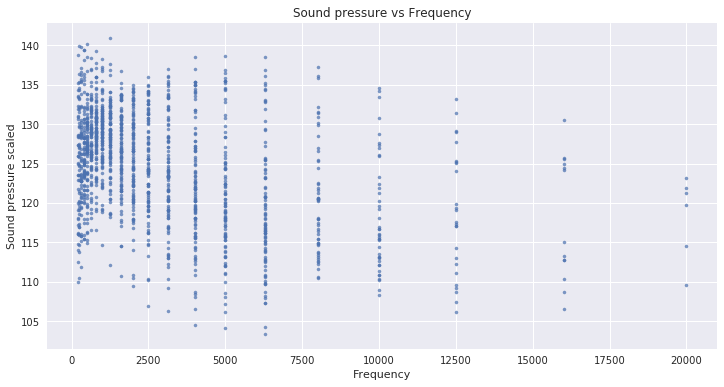

In [3]:
plt.figure(figsize=(12,6));
plt.scatter(df.Frequency,df.Sound_pressure, s=10, alpha=0.7);
plt.xlabel("Frequency");
plt.ylabel("Sound pressure scaled");
plt.title("Sound pressure vs Frequency");

We see discrete values. Lets fit some regression line with help of seaborn to have a qualitative idea about the line.

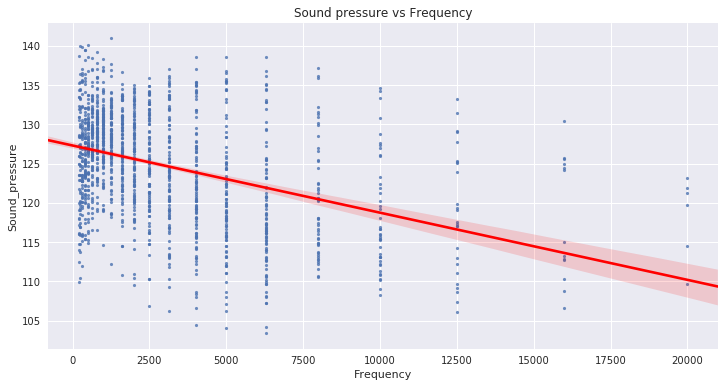

In [4]:
plt.figure(figsize=(12,6));
sns.regplot(df.Frequency, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'},fit_reg=True);
plt.title("Sound pressure vs Frequency");


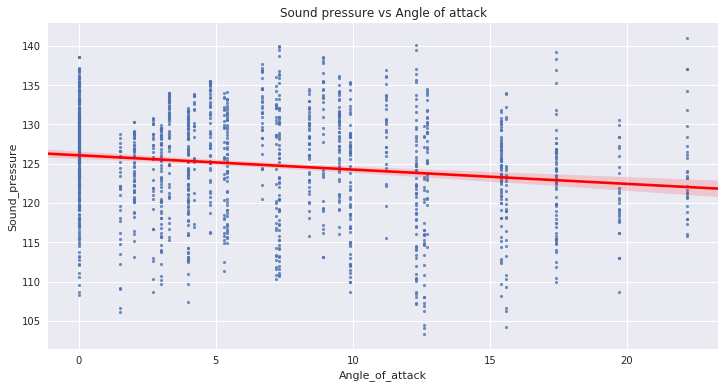

In [5]:
plt.figure(figsize=(12,6));
sns.regplot(df.Angle_of_attack, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True);
plt.title("Sound pressure vs Angle of attack");


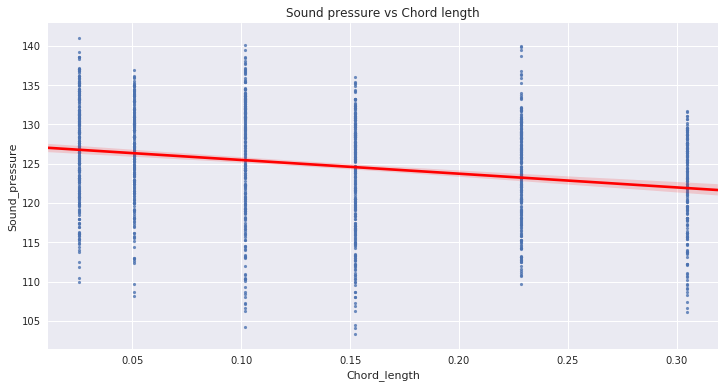

In [6]:
plt.figure(figsize=(12,6));
sns.regplot(df.Chord_length, df.Sound_pressure, scatter_kws={"s":10},line_kws={'color':'red'}, fit_reg=True);
plt.title("Sound pressure vs Chord length");

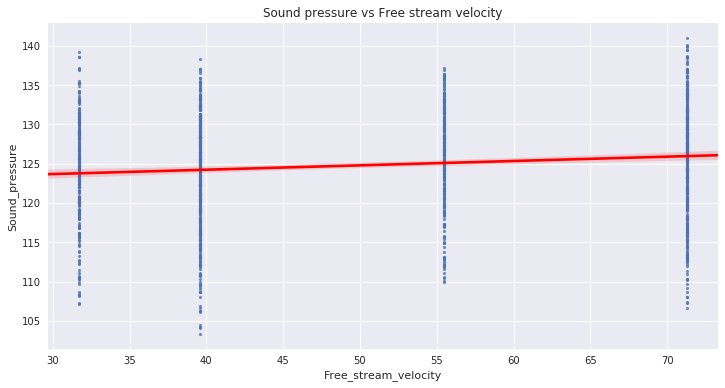

In [7]:
plt.figure(figsize=(12,6));
sns.regplot(df.Free_stream_velocity, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True);
plt.title("Sound pressure vs Free stream velocity");

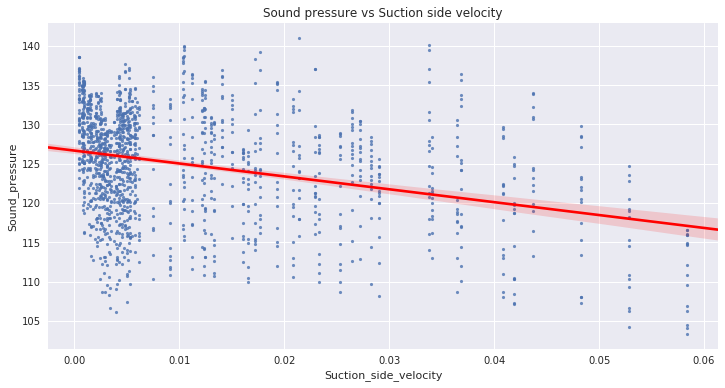

In [8]:
plt.figure(figsize=(12,6));
sns.regplot(df.Suction_side_velocity, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True);
plt.title("Sound pressure vs Suction side velocity");

We thus see a positive association of sound pressure with free stream velocity while for the other inputs it shows negative association. In terms all these variables we will now try to fit a linear regression model using statsmodels. 

# Fit the linear regression using statsmodels

Now in the ols command we can go for a single independent variable (simple linear regression) or involve multiple linear regression (with multiple variables) expressed through formula 'Y ~ A+B+C'. Lets do it here as well. 

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
p=ols('Sound_pressure ~ Frequency + Angle_of_attack + Chord_length + Free_stream_velocity + Suction_side_velocity', df).fit()
print(p.summary())

                            OLS Regression Results                            
Dep. Variable:         Sound_pressure   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     318.6
Date:                Thu, 31 Aug 2017   Prob (F-statistic):          1.60e-232
Time:                        00:58:00   Log-Likelihood:                -4487.5
No. Observations:                1502   AIC:                             8987.
Df Residuals:                    1496   BIC:                             9019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               132.83

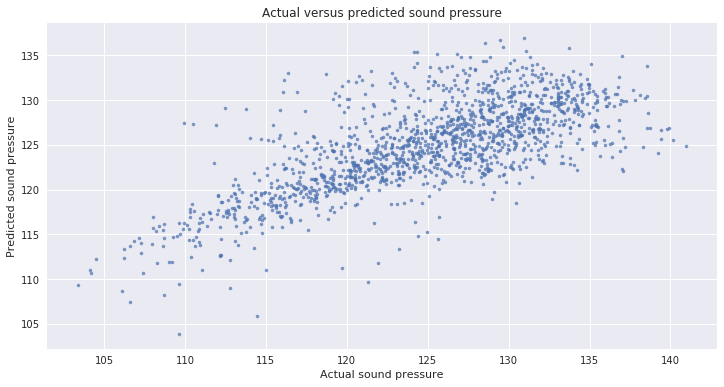

In [10]:
plt.figure(figsize=(12,6));
plt.scatter(df.Sound_pressure,p.fittedvalues, alpha=0.7, s=10);
plt.xlabel("Actual sound pressure");
plt.ylabel("Predicted sound pressure");
plt.title("Actual versus predicted sound pressure")


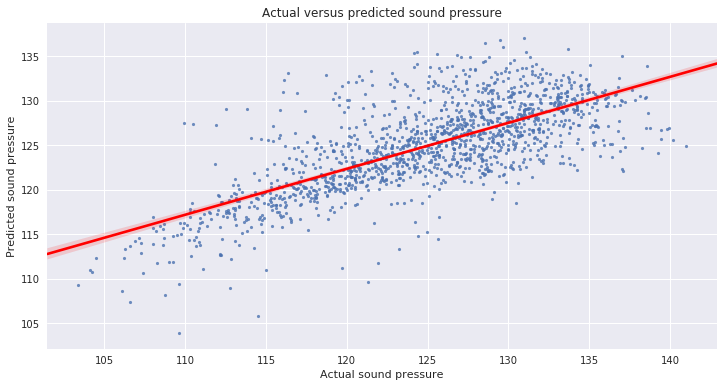

In [11]:
plt.figure(figsize=(12,6));
sns.regplot(df.Sound_pressure,p.fittedvalues,scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True);
plt.xlabel("Actual sound pressure");
plt.ylabel("Predicted sound pressure");
plt.title("Actual versus predicted sound pressure")

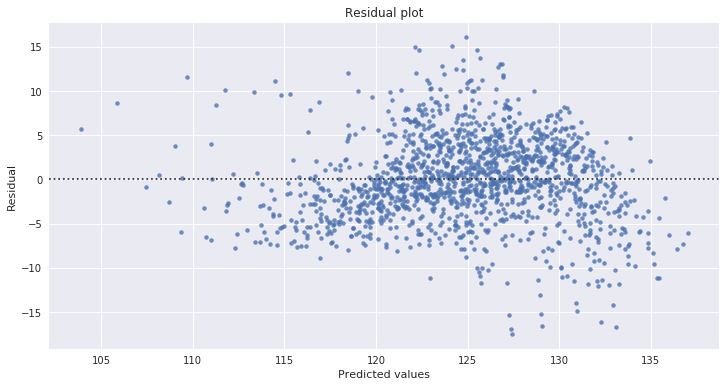

In [12]:
plt.figure(figsize=(12,6));
sns.residplot(p.fittedvalues, p.resid, scatter_kws={"s":20}, line_kws={'color':'red'})
Predicted_values=p.fittedvalues.to_frame()
Residual=p.resid.to_frame()
plt.xlabel("Predicted values");
plt.ylabel("Residual");
plt.title("Residual plot")


# In a nutshell !

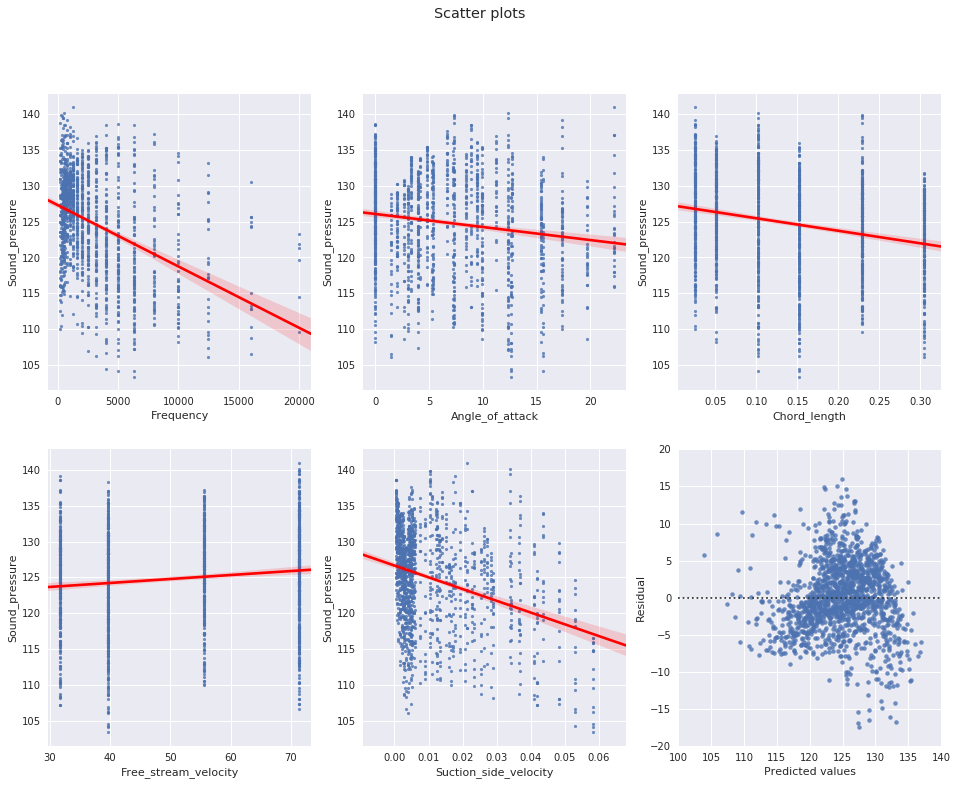

In [13]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=["b"]) 
fig, axs = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(16, 12)
sns.regplot(df.Frequency, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'},fit_reg=True,ax=axs[0,0]);
#plt.title("Sound pressure vs Frequency");
sns.regplot(df.Angle_of_attack, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True,ax=axs[0,1]);
#axs[0,0].set_title()
sns.regplot(df.Chord_length, df.Sound_pressure, scatter_kws={"s":10},line_kws={'color':'red'}, fit_reg=True, ax=axs[0,2]);
sns.regplot(df.Free_stream_velocity, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True, ax=axs[1,0]);
sns.regplot(df.Suction_side_velocity, df.Sound_pressure, scatter_kws={"s":10}, line_kws={'color':'red'}, fit_reg=True,ax=axs[1,1]);
ax=sns.residplot(Predicted_values, Residual, scatter_kws={"s":20}, line_kws={'color':'red'},ax=axs[1,2]);
plt.xlabel("Predicted values");
plt.ylabel("Residual");
ax.set_xlim(100,140);
ax.set_ylim(-20,20);
plt.suptitle("Scatter plots");


In [14]:
Diff1=df.Sound_pressure-p.fittedvalues
pd.DataFrame((list(zip(df.Sound_pressure,p.fittedvalues, Diff1))),columns=['Actual', 'Predicted', 'Difference'])
MSE1=np.mean((df.Sound_pressure- p.fittedvalues)**2)
SSE1=np.sum((df.Sound_pressure- p.fittedvalues)**2)
print(SSE1, MSE1)

34616.08730784026 23.046662655020146


So it appears that the output roughly follows our assumed linear regression model !

# In the next section we shall try to repeat the same with scikit learn and cross validation in sci-kit learn 

In [15]:
from sklearn.linear_model import LinearRegression
A=df.drop('Sound_pressure',axis=1)
lm=LinearRegression()
lm.fit(A,df.Sound_pressure)
y=lm.predict(A)
print("Intercept:" , lm.intercept_)
print("Coefficients", lm.coef_)
df.Sound_pressure.shape
print(y)

Intercept: 132.830004525
Coefficients [ -1.28254380e-03  -4.22067484e-01  -3.56740677e+01   9.99484704e-02
  -1.47291704e+02]
[ 127.40803853  127.08740258  126.63851225 ...,  113.66487565  112.38233185
  110.71502492]


In [16]:
Diff=(df.Sound_pressure-y)
MSE2=np.mean((df.Sound_pressure- y)**2)
SSE2=np.sum((df.Sound_pressure- y)**2)
print(SSE2, MSE2)

34616.0873078403 23.046662655020175


In [17]:
print(np.sqrt(MSE1), np.sqrt(MSE2))

4.8006939764 4.8006939764


In [18]:
pd.DataFrame((list(zip(df.Sound_pressure, p.fittedvalues, y, Diff1, Diff))),columns=['Actual', 'Predicted_stats_model', 'Predicted_sklearn', 'Difference_stats_model', 'Difference_sklearn'])


,Actual,Predicted_stats_model,Predicted_sklearn,Difference_stats_model,Difference_sklearn
0,125.201,127.408039,127.408039,-2.207039,-2.207039
1,125.951,127.087403,127.087403,-1.136403,-1.136403
2,127.591,126.638512,126.638512,0.952488,0.952488
3,127.461,126.125495,126.125495,1.335505,1.335505
4,125.571,125.484223,125.484223,0.086777,0.086777
5,125.201,124.650569,124.650569,0.550431,0.550431
6,123.061,123.560407,123.560407,-0.499407,-0.499407
7,121.301,122.277863,122.277863,-0.976863,-0.976863
8,119.541,120.610556,120.610556,-1.069556,-1.069556
9,117.151,118.430232,118.430232,-1.279232,-1.279232


In the previous section we have tried to come up with a linear regression model for the problem statement with the help of ordinary least squares. 
Lets see the same in scikit learn. 
In course of which, we have complete exhausted our dataset. But then how do we test how good our model is as clearly we don't have any datasets left. Also we may often experience the problem of overfitting or underfitting our model. 
For this we divide our dataset into a training and testing set. Now this is a relatively better way to assess our model.

# Train-test-split

We split the train-test data  randomly. A random state is assigned such that datasets are splitted in unique manner corresponding to the number. 

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(A[0:1499], df.Sound_pressure[0:1499],random_state=10,test_size=0.2)
lm = LinearRegression()
model=lm.fit(x_train,y_train)
predict=lm.predict(x_test)
#df.Sound_pressure[0:1499]

RMSE Train-test-split: 4.65317789313


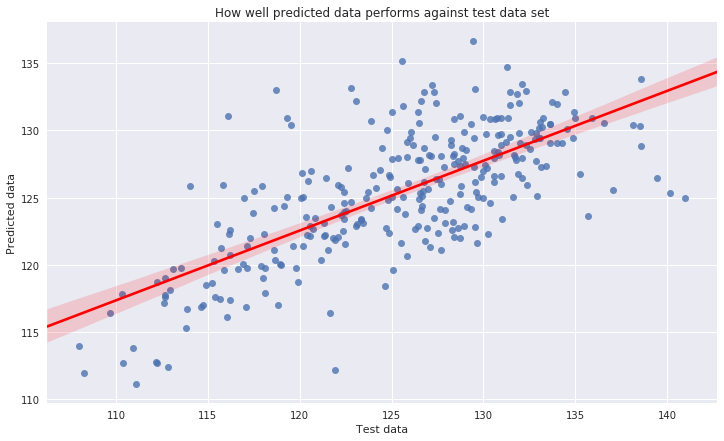

In [20]:
plt.figure(figsize=(12,7))
sns.regplot(y_test,predict,fit_reg=True, line_kws={'color':'red'})
plt.xlabel("Test data")
plt.ylabel ("Predicted data")
plt.title("How well predicted data performs against test data set")
MSE=np.mean((y_test-predict)**2)
RMSE_tts=np.sqrt(MSE)
print("RMSE Train-test-split:", RMSE_tts)

Lets now change the order in which the train datasets are splitted with a different random state and see what happens. 


In [21]:
x_train, x_test, y_train, y_test=train_test_split(A[0:1499], df.Sound_pressure[0:1499],random_state=7,test_size=0.2)
lm = LinearRegression()
model=lm.fit(x_train,y_train)
predict=lm.predict(x_test)

MSE=np.mean((y_test-predict)**2)
RMSE_tts=np.sqrt(MSE)
print("RMSE Train-test-split:", RMSE_tts)

RMSE Train-test-split: 4.87514680443


We thus changing the random state from 10 to 7 we are getting root mean squared error 4.87 from 4.65. Thus there is a high variance associated with the way we split our train and test datasets. Then how can we rely on one particular configuration. To get rid of this its always better to do a cross validation. 

# Cross Validation

 One drawback of this  method is that, it doesn't guarantee the choice of model - as in the datasets already used for testing cannot be further used for tuning the parameters. As such it doesn't ensure which model is better for a particular problem as there is only a training and testing set. Thus we require a validation set against which we can test our parameters. So the idea goes as - TRAINING SET AND TEST SET.. The training set is further divided into a Training and validation set. The training set can be divided in different n folds, where (n-1) folds is treated as training set and the remaining one as test (validation) set and this appears in different combinations. Thus the concept of $\textbf{Cross-validation}$ comes into play- also the procedure mentioned above is known as -$\textbf{K-Fold cross validation}$.



 Remember whatever you do, $\textbf{Do not touch the test set}$.

Lets just isolate out test set first. 

In [22]:
B=df.drop('Sound_pressure', axis=1)
B1_test=B[-100:]
B1_test.head(1000)
B2=B[:-100]
Y_test=df.Sound_pressure[-100:]
Y=df.Sound_pressure[:-100]


Okay so now we are good to go with cross validation with Y as dependent variable  and B2 as independent variable. 

In [30]:
from sklearn.cross_validation import cross_val_score
lm=LinearRegression()


In [24]:
score=cross_val_score(lm, B2, Y, cv=10, scoring='neg_mean_squared_error')
print(score)

[ -7.67787016 -11.13668535 -24.50682899 -16.3899382  -29.07466951
 -25.61051245 -21.59889273 -53.0913026  -41.21610372 -15.99306379]


In [25]:
L=score.mean()
e=np.sqrt(-L)
print("RMSE_cv_1:", e)

RMSE_cv_1: 4.96282044295


# Feature selection :What happens if I get rid of angle of attack, will it affect my predictions. 

Now cross validation often helps us choosing a better model that may contain higher order terms, larger number of neighbours, or reduced features. Lets see what happens if we get rid of angle of attack.


In [26]:
C=df.drop(df.columns[[1,5]],axis=1)

C1_test=C[-100:]
#C1_test.head(100)
C2=C[:-100]
Y1_test=df.Sound_pressure[-100:]
Y=df.Sound_pressure[:-100]
Y.head()

0    125.201
1    125.951
2    127.591
3    127.461
4    125.571
Name: Sound_pressure, dtype: float64

In [27]:
score=cross_val_score(lm ,C2 , Y, cv=10, scoring='neg_mean_squared_error')
print(score)

[ -8.9646853  -10.31549748 -24.4939875  -14.7996342  -34.55573214
 -20.69611364 -24.78204417 -55.94239025 -48.98676589 -17.25079362]


In [28]:
L1=score.mean()
e1=np.sqrt(-L1)
print("RMSE_cv_2:", e1)

RMSE_cv_2: 5.10673715973


In [29]:
print("RMSE_cv_1:", e, "RMSE_cv_2:", e1)

RMSE_cv_1: 4.96282044295 RMSE_cv_2: 5.10673715973


This suggest if we drop angle of contact from our fitted regression equation the cross validated RMSE increases implying the weakening feature of the model characteristics. 